<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.3: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [1]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
import nltk

## Load data

In [2]:
## Loading the data

input_file = 'ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [3]:
print(text[:1000])
print 

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

<function print>

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [4]:
# ANSWER
# Function to clean the text
def clean_text(text):
    # Step 1: Remove metadata markers like ===
    text = re.sub(r'===+', '', text)
    
    # Step 2: Remove quotes (")
    text = text.replace('"', '')
    
    # Step 3: Replace special symbols (e.g., é to e)
    text = text.replace('é', 'e')
    
    # Step 4: Remove or convert emoticons (here we remove them)
    emoticons_pattern = r'[:;=8xX][\-o\*\']?[)\](DdpP/\\oO0|]'
    text = re.sub(emoticons_pattern, '', text)
    
    # Step 5: Add custom markers (e.g., #FLAG, --NAME--)
    # Example: Add --NAME-- marker before each uppercase word (like proper names)
    text = re.sub(r'\b[A-Z][a-z]+\b', r'--NAME-- \g<0>', text)
    
    # Step 6: Remove any remaining extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

# Apply cleaning to the text
cleaned_text = clean_text(text)
print (cleaned_text)


None


## Helper method

In [6]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

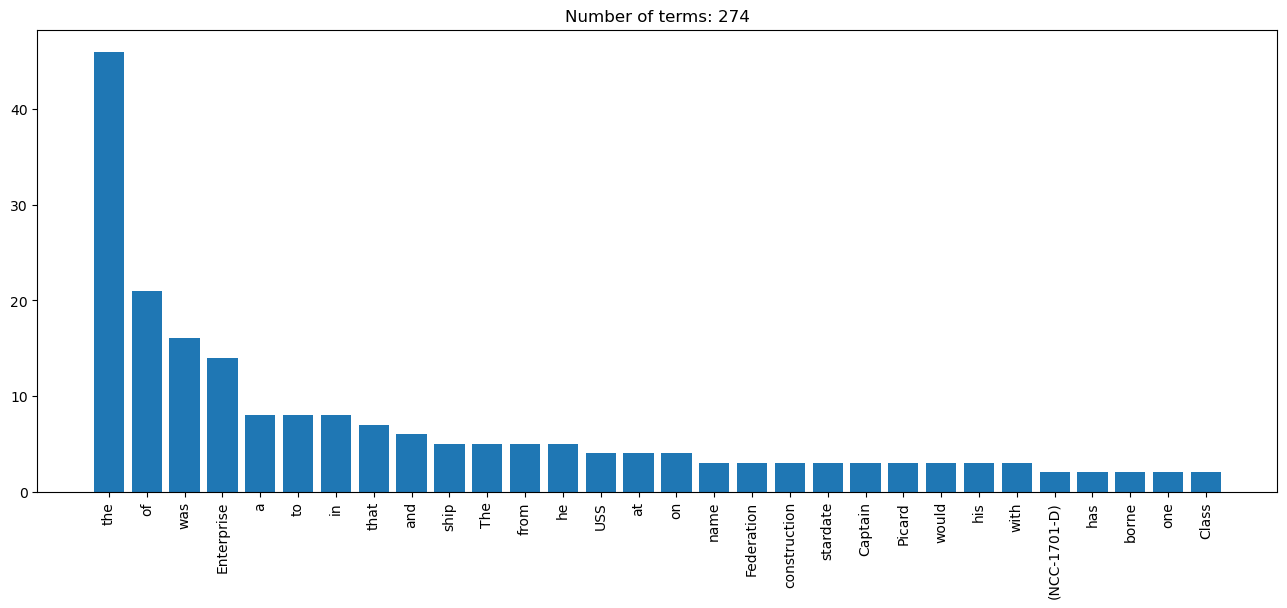

In [7]:
tokens = text.split()
plot_words(tokens)

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [15]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/opt/anaconda3/lib/python3.12/site-packages/spacy/__init__.py", line 13, in <module>
    from . import pipeline  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/spacy/pipeline/__init__.py", line 1, in <module>
    from .attributeruler import AttributeRuler
  File "/opt/anaconda3/lib/python3.12/site-packages/spacy/pipeline/attributeruler.py", line 8, in <module>
    from ..language import Language
  File "/opt/anaconda3/lib/python3.12/site-packages/spacy/language.py", line 43, in <module>
    from .pipe_analysis import analyze_pipes, print_pipe_analysis, validate_attrs
  File "/opt/anaconda3/lib/python3.12/site-packages/spacy/pipe_analysis.py", line 6, in <module>
    from .tokens import Doc, Span, Token
  File "/opt/anaconda3/lib

In [18]:
pip show spacy pydantic


Name: spacy
Version: 3.7.2
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /opt/anaconda3/envs/newIOD/lib/python3.8/site-packages
Requires: catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, preshed, pydantic, requests, setuptools, smart-open, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi, weasel
Required-by: 
---
Name: pydantic
Version: 2.8.2
Summary: Data validation using Python type hints
Home-page: https://github.com/pydantic/pydantic
Author: 
Author-email: Samuel Colvin <s@muelcolvin.com>, Eric Jolibois <em.jolibois@gmail.com>, Hasan Ramezani <hasan.r67@gmail.com>, Adrian Garcia Badaracco <1755071+adriangb@users.noreply.github.com>, Terrence Dorsey <terry@pydantic.dev>, David Montague <david@pydantic.dev>, Serge Matveenko <lig@countzero.co>, Marcelo Trylesinski <marcelotryle@gmail.com>, Sydney Runkle <sydneymarierunkle@gm

In [19]:
pip install --upgrade spacy pydantic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [73 lines of output]
      Ignoring numpy: markers 'python_version >= "3.9"' don't match your environment
        Installing build dependencies: started
        Installing build dependencies: finished with status 'error'
        error: subprocess-exited-with-error
      
        × pip subprocess to install build dependencies did not run successfully.
        │ exit code: 1
        ╰─> [43 lines of output]
            Ignoring numpy: markers 'python_version >= "3.9"' don't match your environment
              Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
              Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
              Using cached murmurhash-1.0.10-cp38-cp38-macosx_10_9_x86_

In [22]:
pip install spacy==3.5.0 pydantic==1.9.0  # Adjust versions as necessary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.6/857.6 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.2
    Uninstalling thinc-8.2.2:
      Successfully uninstalled thinc-8.2.2
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.2
    Uninstalling spacy-3.7.2:
      Successfully uninstalled spacy-3.7.2
Note: you may need to restart the kernel to use updated packages.


In [23]:
# load spaCy and the English model
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

## Tokenise

In [24]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

NameError: name 'doc' is not defined

In [ ]:
# ANSWER

### Stop Words

In [25]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------


NameError: name 'doc' is not defined

In [ ]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

### Check Part of Speech

In [26]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

NameError: name 'doc' is not defined

### Lemmatisation

In [27]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------


NameError: name 'doc' is not defined

In [28]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

NameError: name 'doc' is not defined

### Entity Recognition

In [29]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

NameError: name 'doc' is not defined

## Extra: Using NLTK for NLP

### Tokenise

In [ ]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

In [ ]:
plot_words(tokens)

### Stop words

In [30]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/nicoleperez/nltk_data'
    - '/opt/anaconda3/envs/newIOD/nltk_data'
    - '/opt/anaconda3/envs/newIOD/share/nltk_data'
    - '/opt/anaconda3/envs/newIOD/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = '' # create a list of tokens withOUT the stop words

In [31]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------


NameError: name 'tokens_no_stop' is not defined

In [ ]:
# Create plot of words without stopword
# ANSWER

### Check Part of Speech

In [ ]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [ ]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

### Stemming

In [ ]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatisation

In [ ]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [ ]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

In [ ]:
plot_words(stemmed.split())

In [ ]:
plot_words(lemma.split())

### Entity recognition

In [ ]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



